/tmp/ipykernel_333581/729110779.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  new_data = pd.read_csv(new_file_path, delim_whitespace=True, comment='#', names=columns, skiprows=3)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


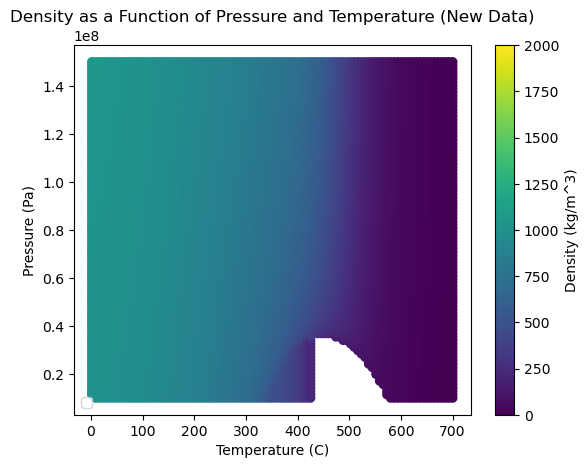

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new dataset from the file uploaded
new_file_path = 'eos_water_test.txt'

# Define the columns as per the dataset
columns = ['T_C', 'P_Pa', 'Density_kg_m3', 'Enthalpy_J_kmol', 'Viscosity_Pa_s', 'Saturation_Pa']

# Reading the new dataset assuming it's space delimited with a specific header
new_data = pd.read_csv(new_file_path, delim_whitespace=True, comment='#', names=columns, skiprows=3)

# Converting the Density column to numeric
new_data['Density_kg_m3'] = pd.to_numeric(new_data['Density_kg_m3'], errors='coerce')

# Filter out any invalid data where density might go negative
negative_density_data_new = new_data[new_data['Density_kg_m3'] < 0]

# Plotting the density as a function of pressure and temperature
fig, ax = plt.subplots()

# Create a scatter plot with temperature on x-axis, pressure on y-axis and color indicating density
sc = ax.scatter(new_data['T_C'], new_data['P_Pa'], c=new_data['Density_kg_m3'], cmap='viridis', vmax=2000, vmin=0)

# Highlight points where density goes negative
if not negative_density_data_new.empty:
    ax.scatter(negative_density_data_new['T_C'], negative_density_data_new['P_Pa'], color='red', label='Negative Density')

# Adding color bar for density scale
cbar = plt.colorbar(sc)
cbar.set_label('Density (kg/m^3)')

# Labeling the plot
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Pressure (Pa)')
ax.set_title('Density as a Function of Pressure and Temperature (New Data)')
ax.legend()

# Show the plot
plt.show()


In [2]:
data

,T_C,P_Pa,Density_kg_m3,Enthalpy_J_kmol,Viscosity_Pa_s,Saturation_Pa
0,2.0,21313131.3,1.01033052E+03,5.328613e+05,0.001634,7.036719e+02
1,2.0,22626262.6,1.01095728E+03,5.560173e+05,0.001634,7.036719e+02
2,2.0,23939393.9,1.01158217E+03,5.791333e+05,0.001633,7.036719e+02
3,2.0,25252525.3,1.01220521E+03,6.022097e+05,0.001632,7.036719e+02
4,2.0,26565656.6,1.01282640E+03,6.252467e+05,0.001632,7.036719e+02
...,...,...,...,...,...,...
9994,700.0,144747475.0,2.32400539E+00,3.655761e+20,0.000062,1.022480e+08
9995,700.0,146060606.0,2.77772895E+00,1.540005e+21,0.000063,1.022480e+08
9996,700.0,147373737.0,3.35745248E+00,6.092196e+21,0.000063,1.022480e+08
9997,700.0,148686869.0,4.11855931E+00,2.275307e+22,0.000063,1.022480e+08
